In [1]:
from magicgap import *

In [ ]:
M_step = 50
M_max = 500
M_range = np.arange(1, M_max, M_step)
R = 20

d_b_range = list(range(3, 17))
data = []
for d_b in d_b_range:
    B = rand_basis(d_b-1, d_b)
    exact = avg_magic_subspace_qudit(qudit_wh_operators(d_b, matrix=True, expanded=True), B)
    approx = [sample_mean(lambda : avg_magic_subspace_mc(qudit_wh_operators(d_b), B, M=M)[0], M=R)[0] for M in M_range]
    err = [float(exact - approx[i])**2 for i in range(len(M_range))]
    data.append(err)
    save_data("monte_carlo", {"M_step": M_step, "M_max": M_max, "R": R, "d_b_range": d_b_range, "data": data})

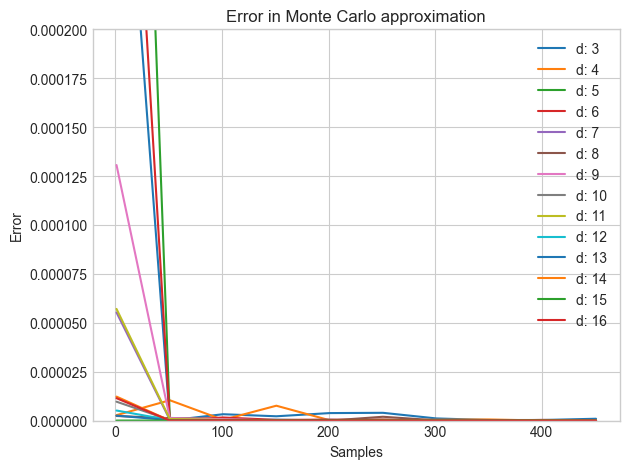

In [11]:
globals().update(load_data("monte_carlo"))
plt.style.use('seaborn-v0_8-whitegrid')

fig, ax = plt.subplots(1)
ax.set_title("Error in Monte Carlo approximation")
ax.set_xlabel("Samples")
ax.set_ylabel("Error")
ax.set_ylim(0, 0.0002)
ax.grid(True)
for i, d_b in enumerate(d_b_range):
    ax.plot(M_range, data[i], label="d: %d" % d_b)
ax.legend()
plt.tight_layout()
plt.savefig("img/monte_carlo.png")
plt.show()